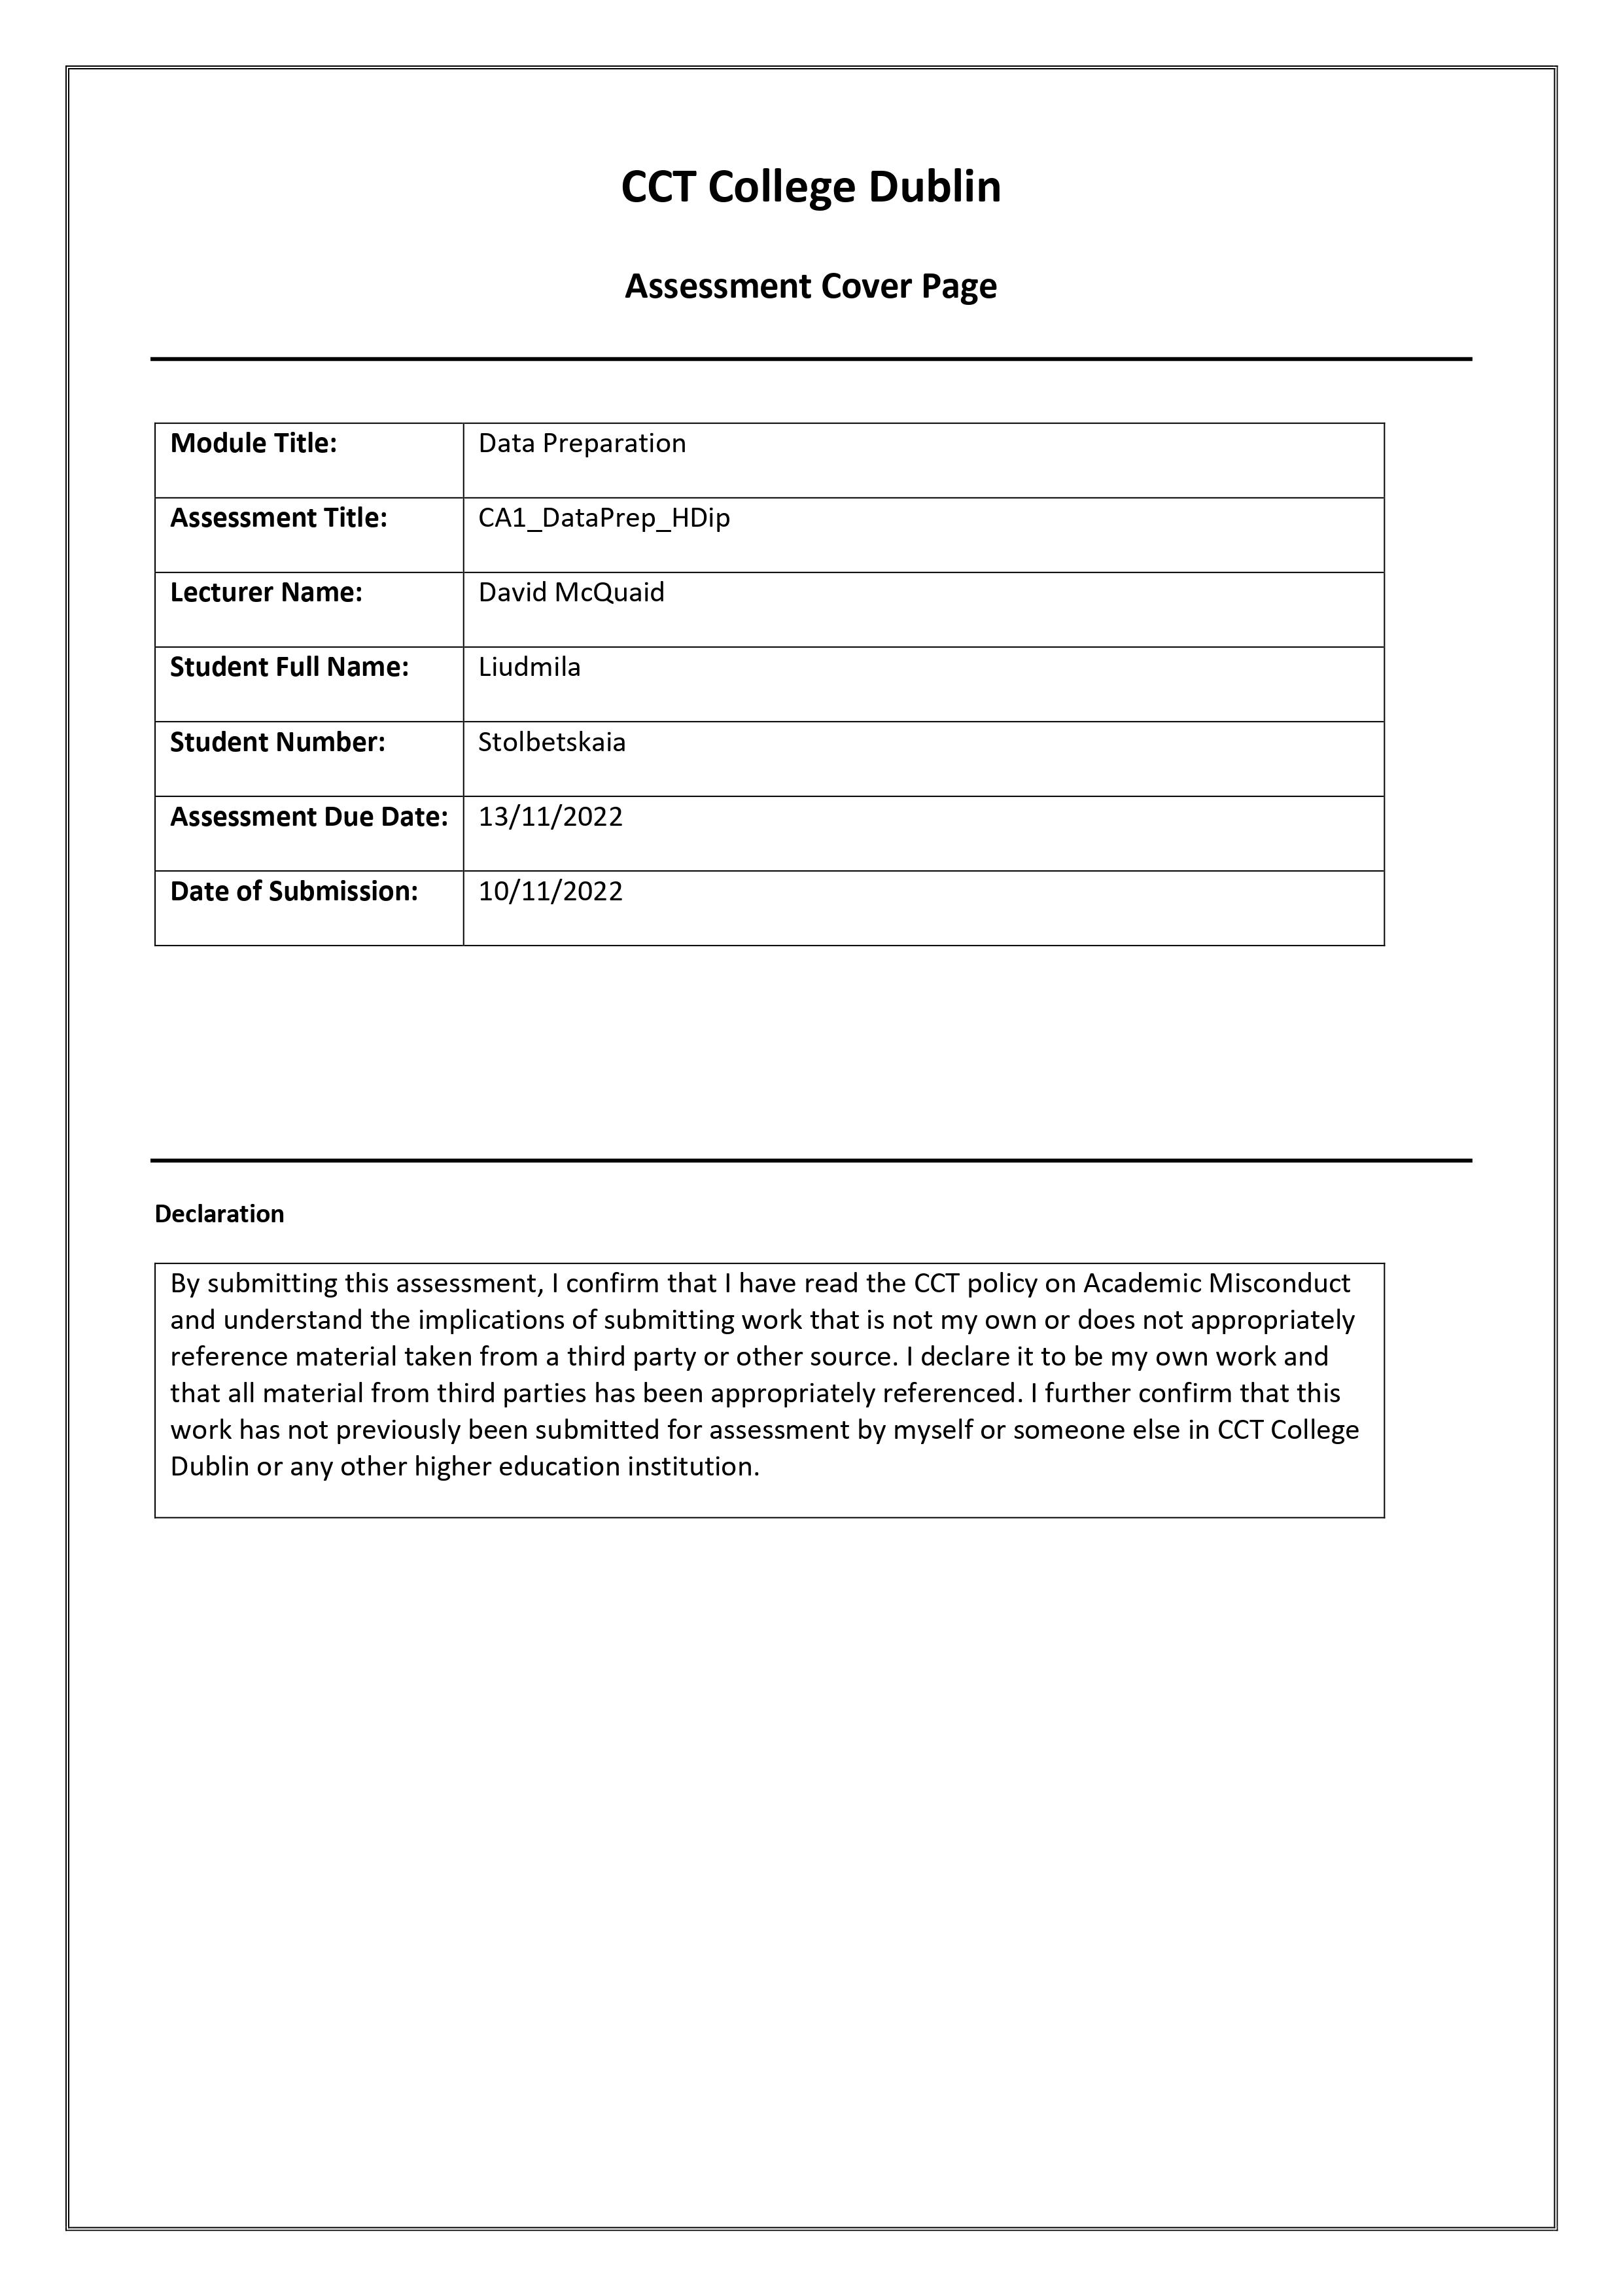

# CA1_DataPrep_HDip


The main goal of any observatons it is to help busnesss to find a soluton for a problem which buseness colud be faced. In the particular case we have a problem with specific component of the APS system. The system in focus is the Air Pressure system (APS) which generates 
pressurised air that are utilized in various functions in a truck, such as braking and gear changes. 

The dataset’s positive class consists of component failures for a specific component of the APS system. The negative class consists of trucks with failures for components not related to the APS. The data consists of a subset of all available data, selected by experts. This analysis will help determine the investment strategy for the company in the upcoming year. 

### Business understanding
Business needs to predict investment in the technical equipment of the company.
The idea of the business is delivery. If we won't able to predict future components businesses will lose time to order new components or will order components which won't be used. It can affect delivery time and company operations. Even more, some tracks can be out of service which can cause losing money and customers.



# Labraries
In order to work with dataframe I will import libraries such as panda, NumPy, matplotlib, seaborn and some additional utils.

### - pandas 
used to analyse, manipulate and clean a dataframe. Also  support operations like Sorting, Re-indexing, Iteration, Concatenation, Conversion of data, Visualizations, Aggregations, etc.
- NumPy 
used to support supports large matrices and multi-dimensional arrays 

- mathplotlib 
used to plot numerical data. Also plots high-defined figures like pie charts, histograms, scatterplots, graphs and so on

- seaborn
used for data visualisation and based on mathplotlib.  It gives a high-level interface for drawing presentable and informative graphics.


In [1]:
import pandas as pd

from sklearn import preprocessing

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas.util.testing as tm

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_16320\3667424763.py:9: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Read the file
### .read_csv()
The function (pandas libraries) used to read a CSV file which will be analysed in the CA


In [2]:
df = pd.read_csv('aps_failure_set.csv')
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


# Size of the dataframe

### .shape 
the function used in order to view the shape of the dataset (rows and columns)

In [3]:
df.shape

(60000, 171)

# Data types
### .dtypes
The function is used to observe the datatypes of the features

It is important to know what types of data we have in the dataset.
The feature must have an appropriate datatype such as integers or boolean as I am going to work only with numerical values

In [4]:
df.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

After running the command it is clear to see that many variables are stored in "object". 
I will convert object types into floats and integers (label "class")

### .info()
Another way to expect the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


# Identify and handle missing values

As I can see, several "na" appeared in the dataset; those are missing values which may hinder our further analysis.


<div>So, I need to identify all those missing values and deal with them?</div> 

Steps for working with missing data:

<ol>
    <li>Identify missing data</li>
    <li>Deal with missing data</li>
    <li>Correct data format</li>
</ol>


### Convert "na" to NaN
In the dataset, missing data comes with the mark "na". The dataset can also consist of marks such as "n.a.","?","NA","n/a", "--" , so I will replace them all. 


We replace "na" with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience. Here we use the function: 
 <pre>.replace( , inplace = True) </pre>




In [6]:
# replace "na" and other expectable marks to NaN
df.replace(["n.a.","?","NA","n/a", "na", "--"], np.nan, inplace = True)
df.head(20)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
5,neg,38312,NaN,2130706432,218,0,0,0,0,0,...,388574,288278,900430,300412,1534,338,856,0,0,0
6,neg,14,0,6,NaN,0,0,0,0,0,...,168,48,60,28,0,0,0,0,0,0
7,neg,102960,NaN,2130706432,116,0,0,0,0,0,...,715518,384948,915978,1052166,1108672,341532,129504,7832,0,0
8,neg,78696,NaN,0,NaN,0,0,0,0,0,...,699290,362510,1190028,1012704,160090,63216,41202,4,0,0
9,pos,153204,0,182,NaN,0,0,0,0,0,...,129862,26872,34044,22472,34362,0,0,0,0,0


### Evaluation of missing data

I will evaluate the missing data in order to have a clear picture of the features. I need to how many missing values I have in order to replace or delete not important features. 

There are two methods to detect missing values 
- .isnull()
used to show if the value is null (will be used)
- .notnull()
used to show if the value is not null

I will create a variable named "missing_data" to store missing data


In [7]:
missing_data = df.isnull()
missing_data.head(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Observation of the values

I will create a loop which will go through all features in the dataframe, count null and not null values and print them in a list. 

In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

class
False    60000
Name: class, dtype: int64

aa_000
False    60000
Name: aa_000, dtype: int64

ab_000
True     46329
False    13671
Name: ab_000, dtype: int64

ac_000
False    56665
True      3335
Name: ac_000, dtype: int64

ad_000
False    45139
True     14861
Name: ad_000, dtype: int64

ae_000
False    57500
True      2500
Name: ae_000, dtype: int64

af_000
False    57500
True      2500
Name: af_000, dtype: int64

ag_000
False    59329
True       671
Name: ag_000, dtype: int64

ag_001
False    59329
True       671
Name: ag_001, dtype: int64

ag_002
False    59329
True       671
Name: ag_002, dtype: int64

ag_003
False    59329
True       671
Name: ag_003, dtype: int64

ag_004
False    59329
True       671
Name: ag_004, dtype: int64

ag_005
False    59329
True       671
Name: ag_005, dtype: int64

ag_006
False    59329
True       671
Name: ag_006, dtype: int64

ag_007
False    59329
True       671
Name: ag_007, dtype: int64

ag_008
False    59329
True       671
Name: ag_008, dtype:

Above we can see all the features with missing values and number of it. 

# Percentage of missing values 

The most convenient way to observe missing values is to list them in a table where we will be able to see the total of missing values and per cent of them. 

We need to know the percentage of missing values as it plays an important role in data manipulation. If the feature has more than 70% of missing values it will not be used. It has a negative impact on future prediction as the data is not clear and it brings noise into the future observations. 

7 features from the top of the table have missing values from 70 to 82 per cent. The best way to deal with this type of feauter is to drop them. 

The rest of the features with less than 70% of missing values could be replaced with the median of the column.


In [9]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
br_000,49264,0.821067
bq_000,48722,0.812033
bp_000,47740,0.795667
bo_000,46333,0.772217
ab_000,46329,0.772150
cr_000,46329,0.772150
bn_000,44009,0.733483
bm_000,39549,0.659150
bl_000,27277,0.454617
bk_000,23034,0.383900


I will use sns library to visualise the missing values. 

Text(0, 0.5, 'Percentage of missing values')

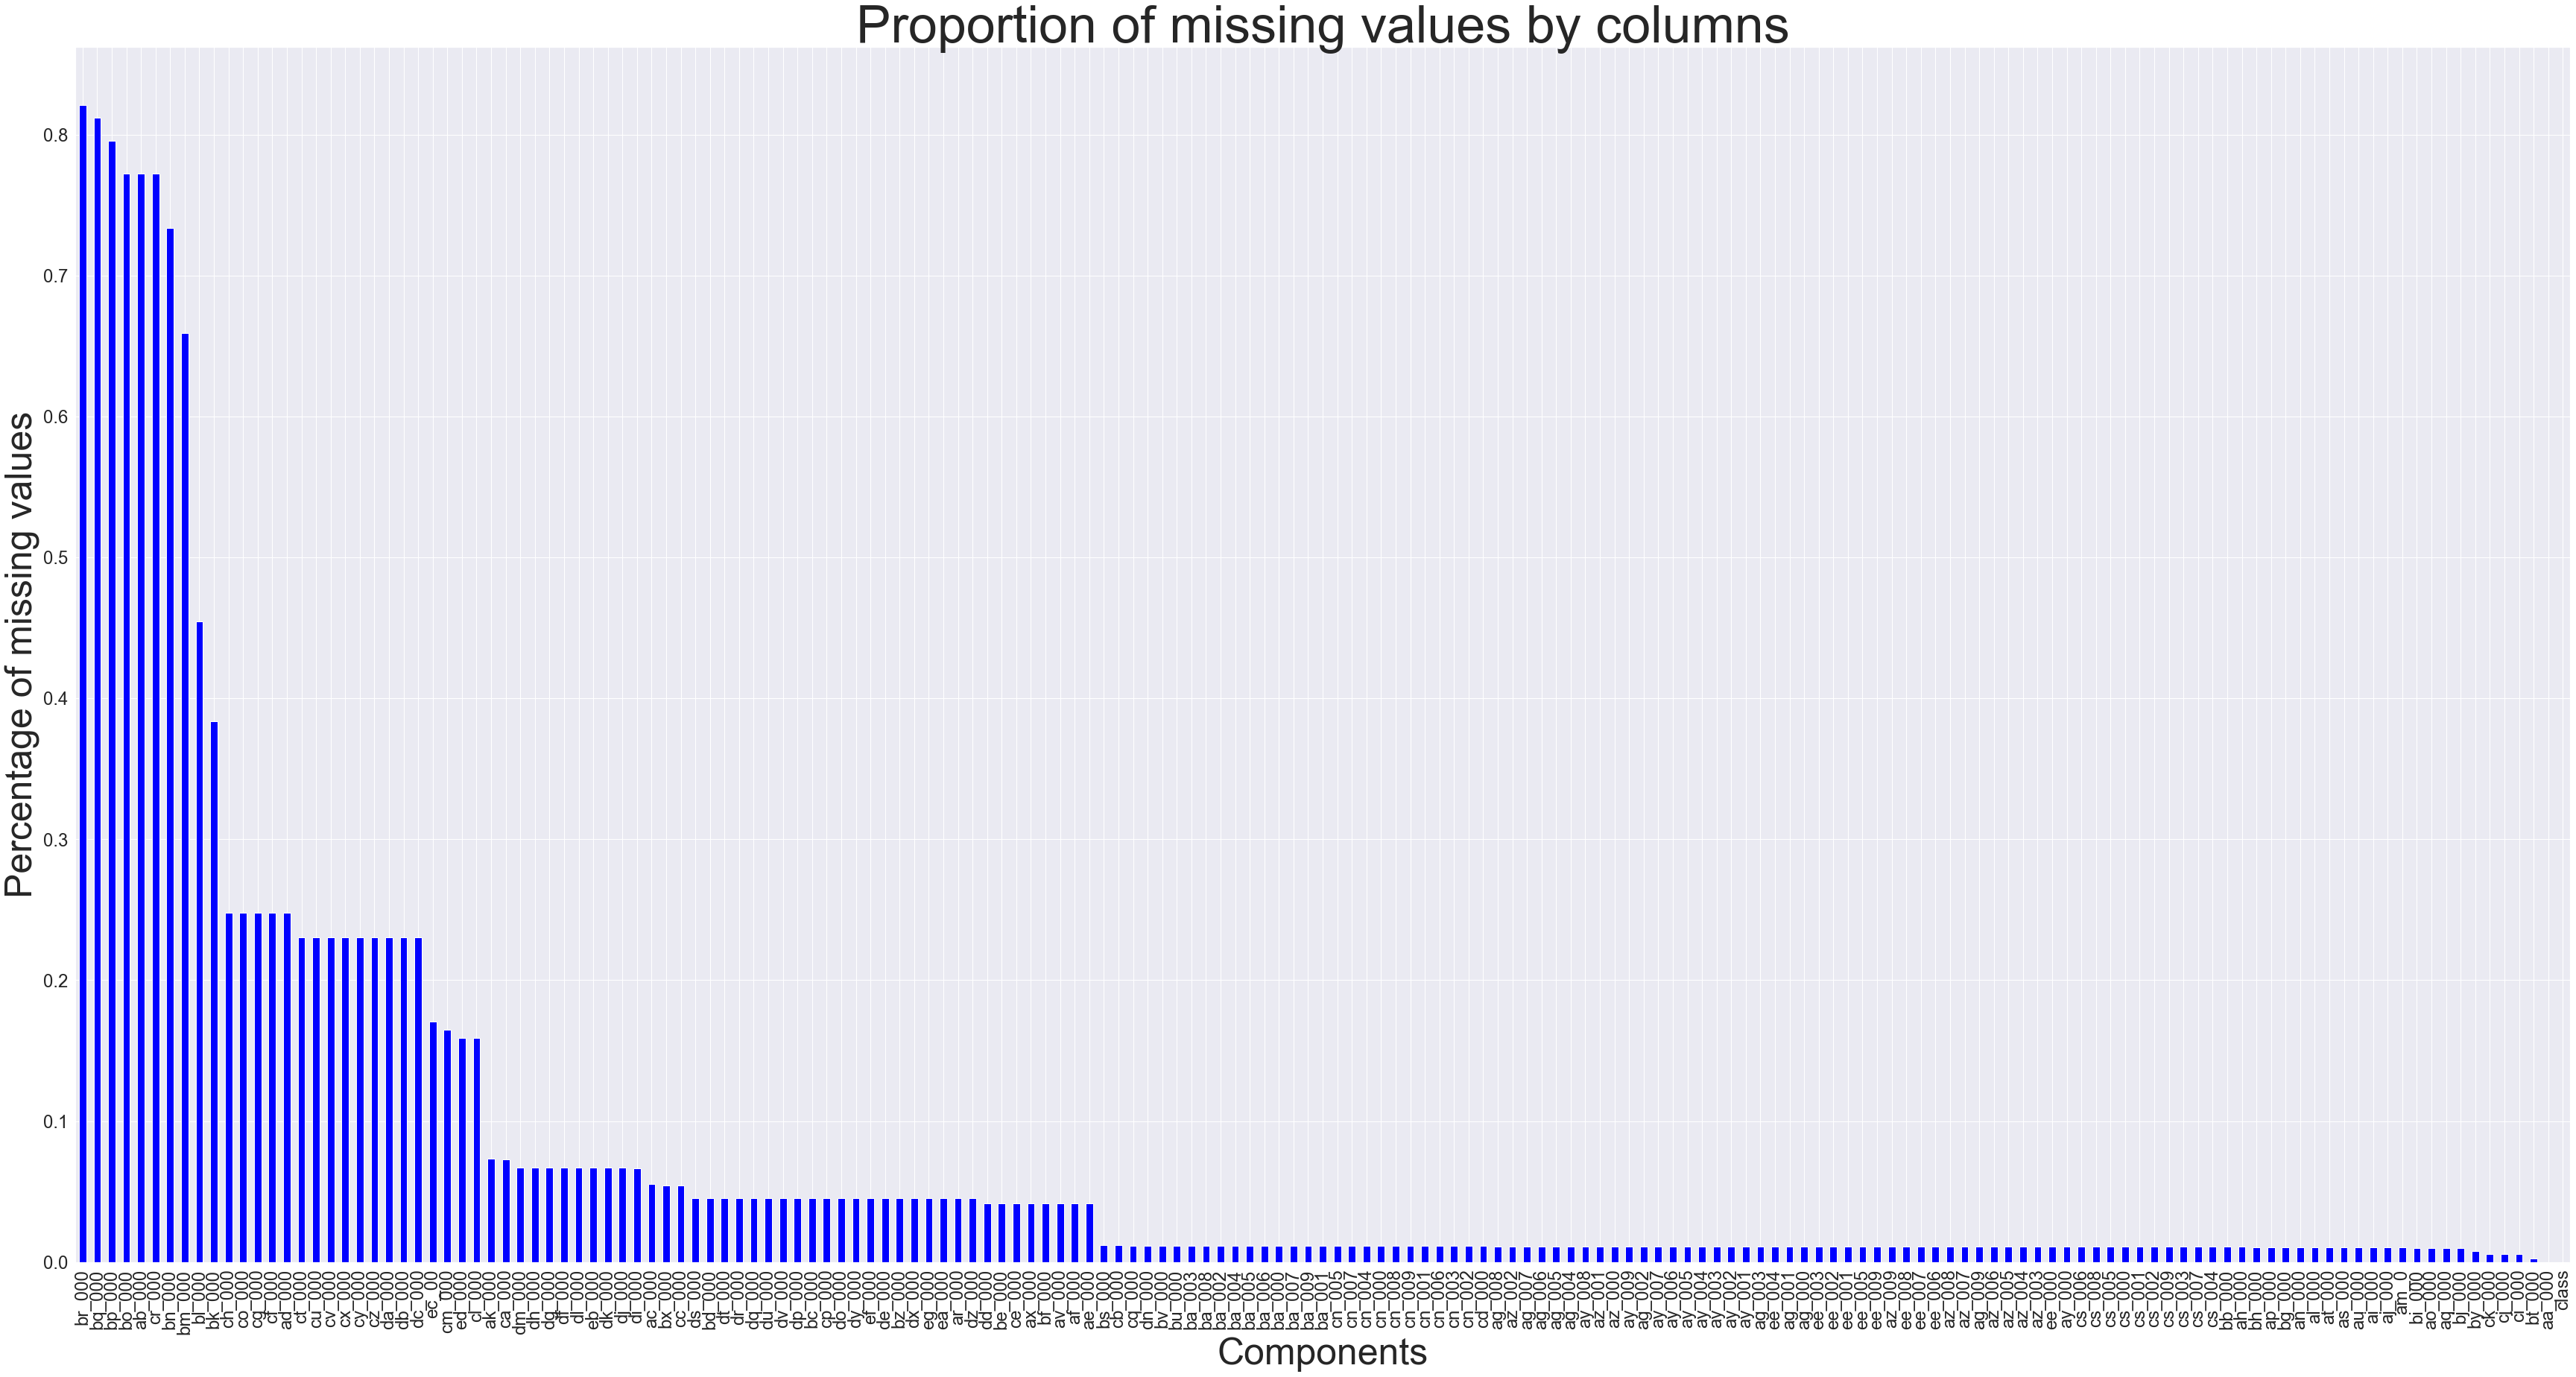

In [57]:
sns.set_theme(style="darkgrid")
g = missing_data['Percent'].plot(kind = 'bar', figsize=(60,30), fontsize=24, color = 'blue')
g.set_title('Proportion of missing values by columns', fontsize=70)
g.set_xlabel('Components', fontsize=50)
g.set_ylabel('Percentage of missing values', fontsize=50)

### .drop() 
The function will be used in order to delete the columns from the dataframe. 

### axis = 1 
represent vertical axis 

I will specify 7 features that should be dropped.

In [11]:
df.drop(['br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000',
                   'cr_000', 'bn_000' ], axis=1, inplace = True)

In [12]:
df.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,0,NaN,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


As a result, we can see that 7 columns have been dropped. Insed of 171 columns we have 164 columns to work with.  

# A lable
The label is a dependable feature (y) which we need to identify in the dataframe. In this case, we have two classes: positive  (component failures for a specific component of the APS system) and negative (failures for components not related to the APS)

- .nunique()
- .unique()

used to identify unique values 


In [13]:
df.nunique() 

class         2
aa_000    22095
ac_000     2061
ad_000     1886
ae_000      333
          ...  
ee_007    30469
ee_008    24213
ee_009     9724
ef_000       28
eg_000       49
Length: 164, dtype: int64

Above we can see the feature "class" has 2 values 

In [14]:
df["class"].unique()

array(['neg', 'pos'], dtype=object)

Above we can see that we have negative and positive values 

I want to know how many positive and negative values we have in the feature "class"

- .value_counts()
Count the number of each category of the variable


In [15]:
df["class"].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

I will use sns to visualise the classes

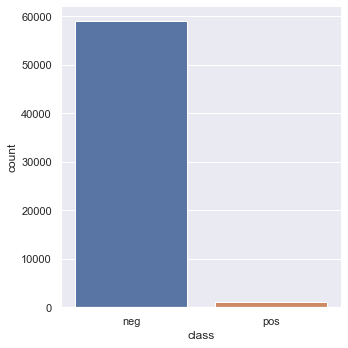

In [16]:
sns.catplot(x='class', kind='count', data=df)

The observation shows that we have more negative values  

# Dtypes conversion
The label consists of "object" values. The task of the CA is to convert it into integers so we will be able to work with them in the future. I am going to transform the variable "class". Negative will be "0" (False) and positive will be "1" (True).

I will use .replace to replace the value and in place to save it


In [17]:
df['class'].replace('neg', 0, inplace = True)
df['class'].replace('pos', 1, inplace = True)
df.head(-5)

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,0,NaN,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,0,81354,2130706432,156,0,0,0,0,0,0,...,627610,376028,931828,1035236,674626,161266,3284,0,0,0
59991,0,39308,452,374,0,0,0,0,0,0,...,312426,161694,323438,292350,250112,157636,234932,9506,0,0
59992,0,14,2,2,0,0,0,0,0,408,...,132,44,80,52,54,0,0,0,0,0
59993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I will use .dtype to see waht type the feature "class" at the moment

In [18]:
df["class"].dtype

dtype('int64')

I will use .value_counts() to cheack the numbrer of values again

In [19]:
df["class"].value_counts()

0    59000
1     1000
Name: class, dtype: int64

# Separate the label
As I have defined the lable it will be more comfortable to separate it from the independent variables. It will give me more flexibility to work with it. 

### Function  is used:
.drop()
 
It will separate the label from the rest of the features 

In my opinion, it is better to separate the label as it is easier to work work with values of independent features.


In [20]:
df_no_lable =  df.drop(["class"], axis = 1) # specifying the columne and the axis
df_no_lable.head(-5)

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,2130706438,280,0,0,0,0,0,0,37250,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,33058,0,NaN,0,0,0,0,0,0,18254,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,41040,228,100,0,0,0,0,0,0,1648,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,12,70,66,0,10,0,0,0,318,2212,...,240,46,58,44,10,0,0,0,4,32
4,60874,1368,458,0,0,0,0,0,0,43752,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,81354,2130706432,156,0,0,0,0,0,0,62040,...,627610,376028,931828,1035236,674626,161266,3284,0,0,0
59991,39308,452,374,0,0,0,0,0,0,3564,...,312426,161694,323438,292350,250112,157636,234932,9506,0,0
59992,14,2,2,0,0,0,0,0,408,3274,...,132,44,80,52,54,0,0,0,0,0
59993,0,0,0,0,0,0,0,0,0,14,...,0,0,0,0,0,0,0,0,0,0


The first column "class" disappeared from the dataframe. Also, we can see only 170 colummns which also says we have one column less. 

# Replacing values

I will start working with dataframe without the label. I will change the datatypes and replace the missing values. One of the variables in the dataframe is "int". However, it will not bring any issues if we want to replace all values at the same time.


-.info() 

used to provide informaton of the variables in the dataframe (data types)

In [21]:
df_no_lable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 163 entries, aa_000 to eg_000
dtypes: int64(1), object(162)
memory usage: 74.6+ MB


# Convertion of the variables 
 -.astype() 
 used to convert variables from objects into floats. I will apply the function to all the features of the dataset. All the features have to be float otherwise we won't be able to perform the features. 

In [22]:
df_no_lable = df_no_lable.astype(float) #converting all features into float

I will use .info() to check to the datatypes after the conversion

In [23]:
df_no_lable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 163 entries, aa_000 to eg_000
dtypes: float64(163)
memory usage: 74.6 MB


We can see that the features have floats as data type

I will check the datframe one more time to count how many missing values are in it. 

In [24]:
df_no_lable.isnull().sum()

aa_000        0
ac_000     3335
ad_000    14861
ae_000     2500
af_000     2500
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 163, dtype: int64

# Repalcing NaN values with the median of each column in the dataframe

We have some missing values in the dataset which we can replace with the average or median of the feature. The column with missing values > 70% has been dropped already so we can only replace it.

From the dataset, we could see that we have many values with zero (outliers). I decided to replace values with the median as it would be the best option if we want to have a better result.

### Median
The Median is one of the measures of the central tendency. Median has a very big advantage rather than Mean. The median value is not as skewed by extremely big or small values as the mean.

### Function used:
- .median() is the value that separates the highest half of a sample or a probability distribution   from the lower half  
- axis = 0 specifies each row 
- skipna = True Exclude NaN values when computing the result.


In [25]:
df_no_lable_med = df_no_lable.median(axis = 0, skipna = True) 


In [26]:
print(df_no_lable_med.tolist())

[30776.0, 152.0, 126.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3672.0, 176020.0, 930336.0, 119204.0, 1786.0, 0.0, 1002420.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1918629.0, 1643556.0, 357281.0, 178792.0, 0.0, 0.0, 0.0, 0.0, 116.0, 66.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 168202.0, 348622.0, 94812.0, 0.0, 2098.0, 636.0, 1016.0, 3570.0, 81614.0, 527034.0, 292.0, 0.0, 0.0, 0.0, 679486.0, 443641.0, 186046.0, 134149.0, 101874.0, 83992.0, 70116.0, 4470.0, 22.0, 0.0, 2360728.0, 16.0, 66.0, 180.0, 2.0, 1002718.0, 26352.0, 179842.0, 154404.0, 210660.0, 222540.0, 239140.0, 50540.0, 30839.86, 2359656.0, 2359656.0, 2258824.0, 12628.0, 1036.0, 25436.0, 278990.0, 2108912.0, 1209600.0, 3409.0, 2.0, 46.0, 0.0, 1858641.12, 0.0, 250267.2, 0.0, 8.0, 0.0, 0.0, 0.0, 34994.0, 518462.0, 703524.0, 96266.0, 9976.0, 1852.0, 24.0, 8.0, 14.0, 2359656.0, 3192.0, 360.0, 20570.0, 121780.0, 91080.0, 1220860.0, 240744.0, 6104.0, 46.0, 0.0, 210.0, 278.0, 1181117.0, 44465.0, 0.0, 202.0, 0.0, 0.0, 1734472.0, 1354.0, 144.0, 0.0, 0.0, 0.0, 0.0, 0.0

We can have an access to each row from the dataframe in case we need to check a median of a particular row. 

I will check 2 different features from the dataframe if it is returns median


In [27]:
df_no_lable_med['ad_000']
print("Median of ad_000 is: ",df_no_lable_med['ad_000'] )

Median of ad_000 is:  126.0


In [28]:
df_no_lable_med["aa_000"]
print("Median of aa_000 is: ", df_no_lable_med["aa_000"] )

Median of aa_000 is:  30776.0


# Replacing

- .replace() replace the value 
- np.nan using numpy to replace values with NaN
- inplace saves new values 

In [29]:
#replacing NaN with the avarage using Pandas libraries and saving changes
df_no_lable.replace(np.nan, df_no_lable_med, inplace=True)

### I will check if the NaN values have been replaced

In [30]:
df_no_lable.head(-5)

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,81354.0,2.130706e+09,156.0,0.0,0.0,0.0,0.0,0.0,0.0,62040.0,...,627610.0,376028.0,931828.0,1035236.0,674626.0,161266.0,3284.0,0.0,0.0,0.0
59991,39308.0,4.520000e+02,374.0,0.0,0.0,0.0,0.0,0.0,0.0,3564.0,...,312426.0,161694.0,323438.0,292350.0,250112.0,157636.0,234932.0,9506.0,0.0,0.0
59992,14.0,2.000000e+00,2.0,0.0,0.0,0.0,0.0,0.0,408.0,3274.0,...,132.0,44.0,80.0,52.0,54.0,0.0,0.0,0.0,0.0,0.0
59993,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can see there is no missing values anymore. I will do an observation of the dataset one more time.  will use describe a function that will show us percentile, mean, std and quartiles. I will also use a histogram for feature visualisation in order to show the distribution of the features. 

In [31]:
df_no_lable.describe()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000
mean,5.933650e+04,3.362258e+08,1.434383e+05,6.535000,10.548200,2.191577e+02,9.648104e+02,8.509771e+03,8.760054e+04,4.322495e+05,...,4.431223e+05,2.100188e+05,4.432268e+05,3.916653e+05,3.303672e+05,3.428586e+05,1.372212e+05,8.295099e+03,0.086467,0.203100
std,1.454301e+05,7.767625e+08,3.504525e+07,158.147893,205.387115,2.036364e+04,3.400891e+04,1.494818e+05,7.575171e+05,2.361408e+06,...,1.149276e+06,5.403725e+05,1.162002e+06,1.114964e+06,1.063465e+06,1.718666e+06,4.472145e+05,4.721249e+04,4.268570,8.628043
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,2.000000e+01,4.200000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.180000e+02,...,3.033500e+03,1.204000e+03,2.848500e+03,3.839000e+03,5.600000e+02,1.180000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.672000e+03,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,8.480000e+02,2.920000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.812400e+04,...,4.350315e+05,2.164440e+05,4.624655e+05,4.003010e+05,2.725220e+05,1.663465e+05,1.367255e+05,1.934000e+03,0.000000,0.000000
max,2.746564e+06,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,2.288306e+08,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


- mean>median says we have skewed data.
- std has a very high number.
- 1,3 qurtiles in sime features == 0. 

I can conclude that we are dealing with high number of outliers. 



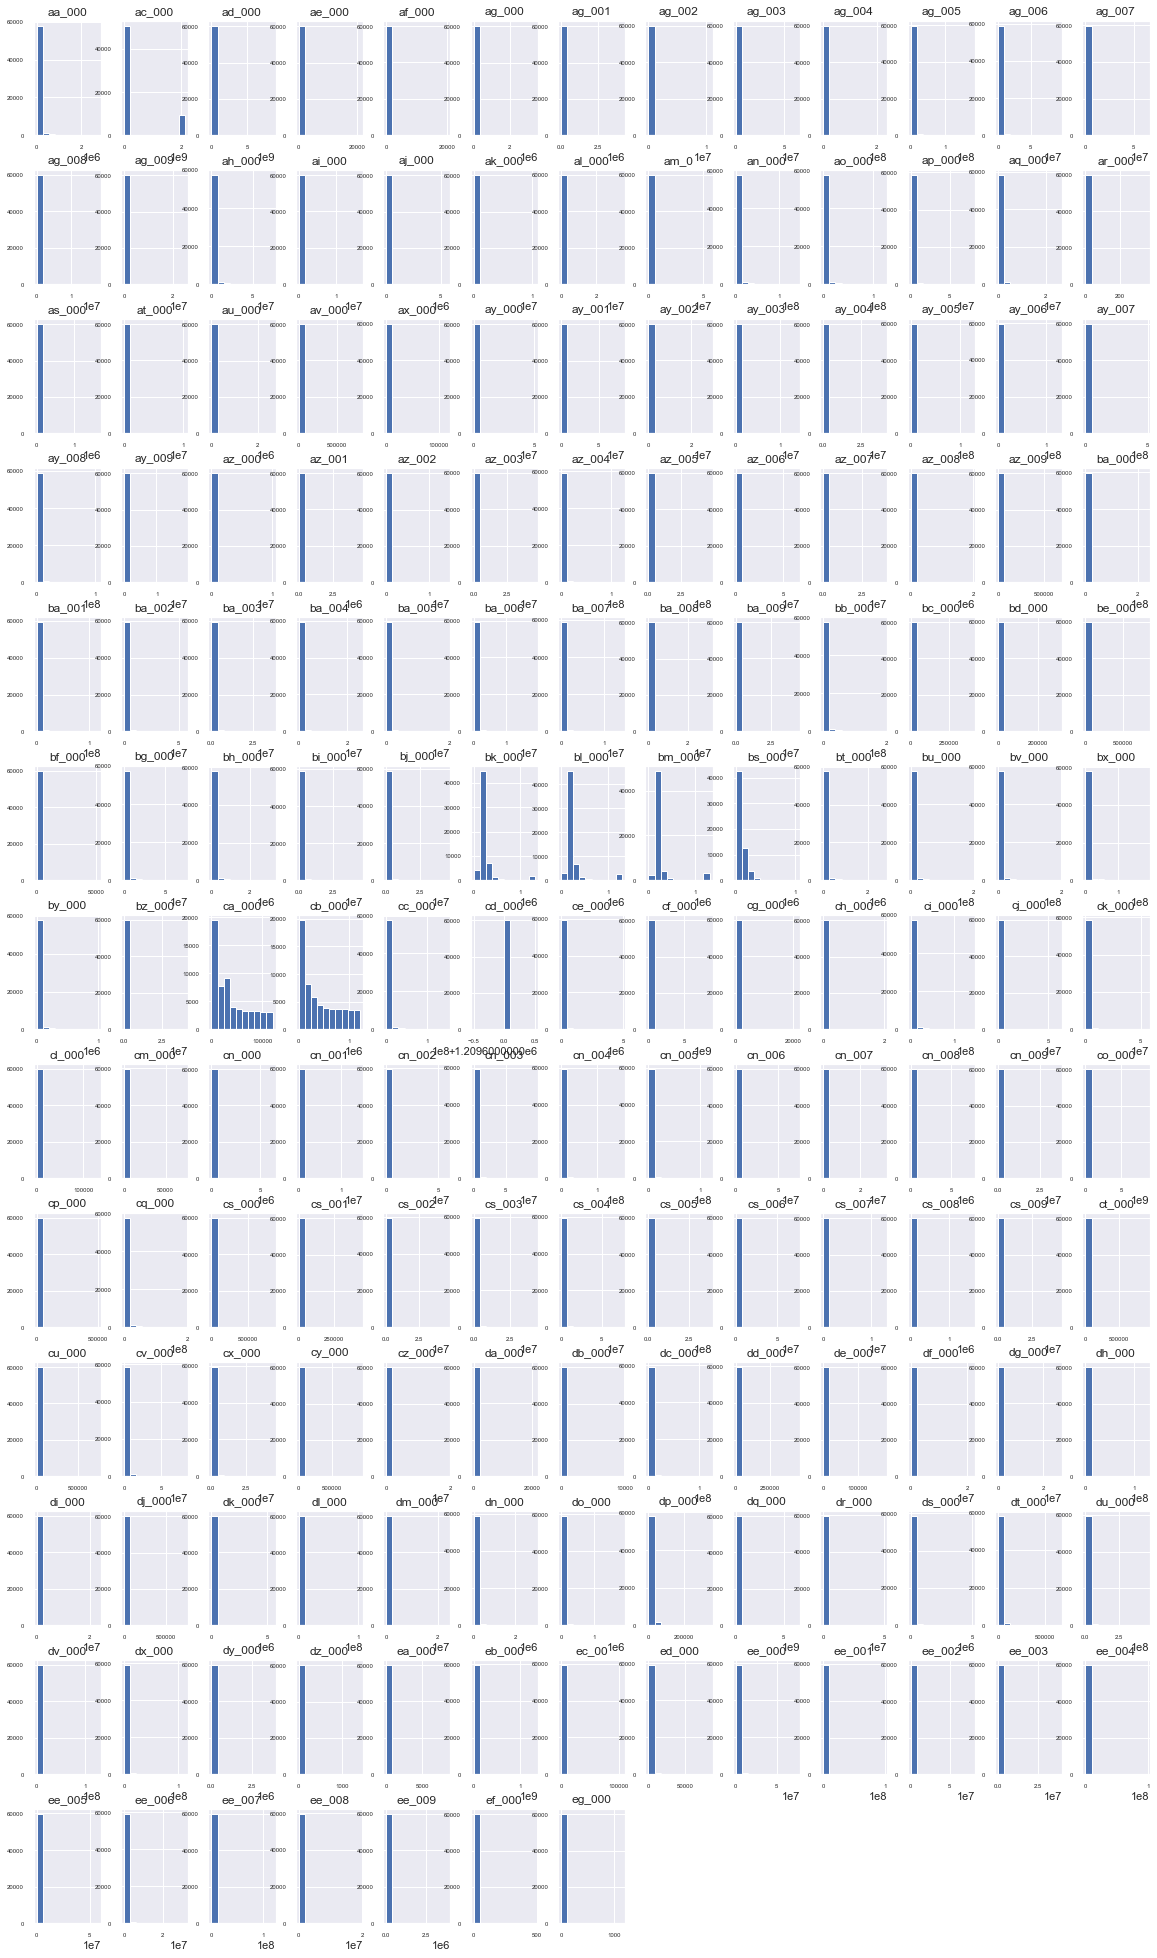

In [32]:
df_no_lable.hist(figsize=(20,35),bins=10,xlabelsize=6,ylabelsize=6);

It is noticeable that many features in the datframe are mostly placed around zero. The visualisation also, says we are mostly dealing with sparse data and high demand of outliers.

6 features from the dataset are different from the majority. They have positeve skeew. That says the data lies on the right side. 

I will plot on of the feature for an example

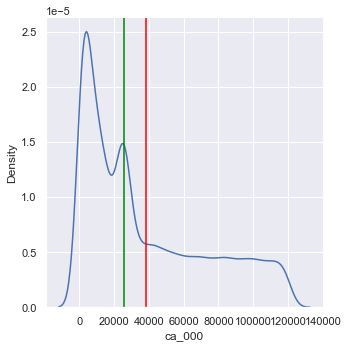

In [33]:
sns.displot(df_no_lable, x='ca_000', kind = 'kde')
mean1 = df_no_lable['ca_000'].mean()
median1 = df_no_lable['ca_000'].median()
plt.axvline(mean1, color='red')
plt.axvline(median1, color='green')

# Data Scaling and PCA

In order to perform PCA I will need to normalise data. I have used the median for the missing data values so I think it would not be appropriate to use. In this particular case, the most appropriate technics could be the min and max scalers. Also, the scaler is a good solution for outliers with which we are dealing. It will shrink the data in the given range(from 0 to1)

Use PCA to establish the minimum number of features needed for retaining 99.5% variance in the data and 
then implement PCA to dimensionally reduce the data to the number of features that you have discovered. 

PCA is an  unsupervised dimensionality reduction algorithm used to extract information form highly-dimensional space. It projects squeezed data into a lower-dimensional sub-space.

We can cluster the similar data points based on the feature correlation between them.

I will reduce the number of features for n number. The reduction of the data calls dimensionality. One of the reasons why PCA can be used is when the dimensions of the input features are high.  We only need to identify a pattern among the features and choose only useful features from the dataframe. Also, remove outliers, 

It will keep the essential parts that have more variation in the data and remove the non-essential parts with less variation.


In [34]:
df_no_lable.shape

(60000, 163)

### Number of component and visualistion

One of the vital parts of PCA is defining a number of components needed to describe the data. 

We need to visualise the variance of the features in the datframe in order to perform analysis. So I am going to take df_no_lable and put it through the PCA algorithm. I will create  "pca" frame to save my PCA analysis. 

- .PCA() 
is the algorithm used for PCA analysis 
- .cumsum() 
return the cumulative sum of the elements along a given axis.
- .explained_variance_ratio_
percentage of variance explained by each of the selected components


In [35]:
from sklearn.preprocessing import MinMaxScaler
minmax_df = MinMaxScaler().fit_transform(df_no_lable)
#minmax_df = minmax_df .transform(df_no_lable)

In [36]:
df_scaled = pd.DataFrame(minmax_df , columns = ['aa_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 'cl_000', 'cm_000', 'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009', 'co_000', 'cp_000', 'cq_000', 'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009', 'ct_000', 'cu_000', 'cv_000', 'cx_000', 'cy_000', 'cz_000', 'da_000', 'db_000', 'dc_000', 'dd_000', 'de_000', 'df_000', 'dg_000', 'dh_000', 'di_000', 'dj_000', 'dk_000', 'dl_000', 'dm_000', 'dn_000', 'do_000', 'dp_000', 'dq_000', 'dr_000', 'ds_000', 'dt_000', 'du_000', 'dv_000', 'dx_000', 'dy_000', 'dz_000', 'ea_000', 'eb_000', 'ec_00', 'ed_000', 'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009', 'ef_000', 'eg_000'])
pd.options.display.float_format = "{:.4f}".format 
df_scaled.head(-5)

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0279,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0002,...,0.0159,0.0131,0.0074,0.0082,0.0107,0.0013,0.0038,0.0000,0.0000,0.0000
1,0.0120,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,...,0.0054,0.0047,0.0030,0.0043,0.0042,0.0007,0.0051,0.0004,0.0000,0.0000
2,0.0149,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0036,0.0042,0.0044,0.0071,0.0101,0.0013,0.0049,0.0001,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000,0.0005,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0083,0.0279
4,0.0222,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0002,...,0.0080,0.0061,0.0042,0.0060,0.0091,0.0026,0.0225,0.0003,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,0.0296,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0003,...,0.0081,0.0100,0.0096,0.0180,0.0213,0.0013,0.0002,0.0000,0.0000,0.0000
59991,0.0143,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0040,0.0043,0.0033,0.0051,0.0079,0.0013,0.0122,0.0025,0.0000,0.0000
59992,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
59993,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [38]:
from sklearn.decomposition import PCA

pca = PCA(0.995).fit(df_scaled)
number = pca.n_components_
print('The number of components is: ', number)

The number of components is:  67


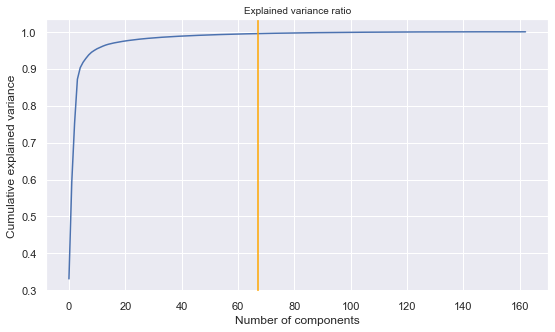

In [58]:
plt.rcParams["figure.figsize"] = (9,5)

pca = PCA().fit(df_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained variance ratio', fontsize = 10)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axvline(number, color = 'orange')



In order to determine features that will be used for reduction we should follow the blue line. The number of features will be determined when the blue line hit 99.5% 

In [40]:
pca = PCA(67)

In [41]:
projected = pca.fit_transform(df_scaled)

I will use shape function. It will show the number of rows and columns that we have at the moment. So we have a new column to work on. The number of columns that we had (163) no longer exist. 

In [43]:
projected.shape

(60000, 67)

### New names of the columns

I will give names for 67 features that we have at the moment 
I also, will create a new dataframe and save the PCA features we already have from the previous steps in it. 

In [44]:
df_pca = pd.DataFrame(projected, columns = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16','F17','F18','F19'
                                           ,'F20','F21','F22','F23','F24','F25','F26','F27','F28','F29','F30','F31','F32','F33','F34','F35','F36','F37','F38','F39'
                                           ,'F40','F41','F42','F43','F44','F45','F46','F47','F48','F49','F50','F51','F52','F53','F54','F55','F56','F57','F58','F59'
                                           ,'F60','F61','F62','F63','F64','F65','F66','F67'])
df_pca.head(-5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F58,F59,F60,F61,F62,F63,F64,F65,F66,F67
0,0.3597,0.7605,0.2513,0.1133,-0.0531,0.0390,0.0014,-0.0574,-0.0224,0.0210,...,-0.0000,0.0023,0.0033,0.0038,0.0074,-0.0093,0.0046,0.0021,-0.0074,-0.0026
1,0.1550,-0.1772,0.0730,-0.1604,0.6781,0.0966,0.0323,0.0485,-0.0193,0.0060,...,0.0026,-0.0012,0.0039,0.0008,-0.0015,0.0025,0.0003,0.0022,0.0046,-0.0011
2,-0.2052,-0.0969,-0.1705,-0.0120,0.0052,-0.0443,-0.0015,-0.0092,0.0029,-0.0086,...,0.0018,-0.0022,0.0013,-0.0004,-0.0013,0.0024,-0.0008,0.0016,0.0006,-0.0007
3,-0.4688,-0.0746,-0.1038,-0.0383,-0.0024,-0.0078,0.0033,0.0088,-0.0015,0.0042,...,-0.0010,0.0004,-0.0035,-0.0024,-0.0036,0.0020,0.0163,0.0027,-0.0019,0.0005
4,0.2720,-0.1901,-0.0200,-0.0546,-0.0177,0.0588,-0.0089,-0.0237,-0.0099,0.0144,...,-0.0017,-0.0005,-0.0014,-0.0010,0.0008,0.0053,-0.0017,0.0028,-0.0061,-0.0018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,0.1261,0.8460,0.0112,0.1201,-0.0102,-0.0068,-0.0079,-0.0614,-0.0190,-0.0357,...,-0.0010,-0.0010,0.0072,-0.0014,-0.0011,0.0012,0.0002,0.0008,0.0050,0.0007
59991,-0.4018,-0.0917,-0.0915,0.0244,-0.0070,-0.0145,-0.0035,-0.0187,-0.0071,-0.0076,...,0.0001,0.0026,0.0027,-0.0021,-0.0018,0.0004,-0.0008,-0.0008,-0.0029,0.0011
59992,-0.4747,-0.0738,-0.1040,-0.0377,-0.0007,-0.0088,0.0032,0.0083,-0.0015,0.0021,...,-0.0009,0.0004,-0.0012,0.0005,0.0004,-0.0003,0.0000,-0.0006,-0.0000,-0.0002
59993,-0.4779,-0.0735,-0.1039,-0.0367,-0.0015,-0.0083,0.0033,0.0085,-0.0015,0.0037,...,-0.0011,0.0005,-0.0012,0.0003,0.0004,-0.0005,-0.0001,-0.0005,-0.0001,-0.0004


In [45]:
df_pca.shape

(60000, 67)

# Add the label
I separated the label "class" from the dataframe many steps ago so it should be brought back in order to perform ML models. We need to have independent and dependent variables in order to do that. 

I will add the label into datframe "df_pca" from dataframe "df". 



In [46]:
df_pca["class"] = df["class"]
df_pca.head(-5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F59,F60,F61,F62,F63,F64,F65,F66,F67,class
0,0.3597,0.7605,0.2513,0.1133,-0.0531,0.0390,0.0014,-0.0574,-0.0224,0.0210,...,0.0023,0.0033,0.0038,0.0074,-0.0093,0.0046,0.0021,-0.0074,-0.0026,0
1,0.1550,-0.1772,0.0730,-0.1604,0.6781,0.0966,0.0323,0.0485,-0.0193,0.0060,...,-0.0012,0.0039,0.0008,-0.0015,0.0025,0.0003,0.0022,0.0046,-0.0011,0
2,-0.2052,-0.0969,-0.1705,-0.0120,0.0052,-0.0443,-0.0015,-0.0092,0.0029,-0.0086,...,-0.0022,0.0013,-0.0004,-0.0013,0.0024,-0.0008,0.0016,0.0006,-0.0007,0
3,-0.4688,-0.0746,-0.1038,-0.0383,-0.0024,-0.0078,0.0033,0.0088,-0.0015,0.0042,...,0.0004,-0.0035,-0.0024,-0.0036,0.0020,0.0163,0.0027,-0.0019,0.0005,0
4,0.2720,-0.1901,-0.0200,-0.0546,-0.0177,0.0588,-0.0089,-0.0237,-0.0099,0.0144,...,-0.0005,-0.0014,-0.0010,0.0008,0.0053,-0.0017,0.0028,-0.0061,-0.0018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,0.1261,0.8460,0.0112,0.1201,-0.0102,-0.0068,-0.0079,-0.0614,-0.0190,-0.0357,...,-0.0010,0.0072,-0.0014,-0.0011,0.0012,0.0002,0.0008,0.0050,0.0007,0
59991,-0.4018,-0.0917,-0.0915,0.0244,-0.0070,-0.0145,-0.0035,-0.0187,-0.0071,-0.0076,...,0.0026,0.0027,-0.0021,-0.0018,0.0004,-0.0008,-0.0008,-0.0029,0.0011,0
59992,-0.4747,-0.0738,-0.1040,-0.0377,-0.0007,-0.0088,0.0032,0.0083,-0.0015,0.0021,...,0.0004,-0.0012,0.0005,0.0004,-0.0003,0.0000,-0.0006,-0.0000,-0.0002,0
59993,-0.4779,-0.0735,-0.1039,-0.0367,-0.0015,-0.0083,0.0033,0.0085,-0.0015,0.0037,...,0.0005,-0.0012,0.0003,0.0004,-0.0005,-0.0001,-0.0005,-0.0001,-0.0004,0


We can see the complited datframe

# Testing models

One of the tasks that we have is to engineer new feature selection in data with the goal of improving the performance of machine learning models.

In order to identyfi if the number of used features is correct we can test different ML models to see which if perform better. If we won't get the good performance we can change the number of PCA features

I will save values of pca datframe in arrays in order to use them form ML testing. It will be easer for me to use them. 

In [47]:
df_array = df_pca.values
df_array

array([[ 3.59662245e-01,  7.60462887e-01,  2.51289270e-01, ...,
        -7.40254032e-03, -2.59842566e-03,  0.00000000e+00],
       [ 1.55002559e-01, -1.77170744e-01,  7.29739762e-02, ...,
         4.63875887e-03, -1.10053031e-03,  0.00000000e+00],
       [-2.05206548e-01, -9.69473385e-02, -1.70538997e-01, ...,
         6.19523383e-04, -6.63594716e-04,  0.00000000e+00],
       ...,
       [-3.15800687e-01,  8.85684246e-01,  1.13682899e-01, ...,
         3.83690383e-04, -3.71363730e-04,  0.00000000e+00],
       [-2.51653973e-01,  8.35612163e-01,  2.33287610e-01, ...,
        -4.39962188e-03, -4.78157907e-03,  0.00000000e+00],
       [ 2.48544207e-01, -1.69147779e-01, -8.62081948e-02, ...,
         1.26686686e-03, -2.97298733e-03,  0.00000000e+00]])

I will split the datframe into X and y in order to perform ML model. X will be indepnedet features and y will be dependent


In [48]:
from sklearn.model_selection import train_test_split
X = df_array[:,0:67] # all the values from 1 to 67 columns
y = df_array[:,67] # all the values from the last column 
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size = 0.2, random_state=1)
X_train.shape, X_validation.shape, Y_train.shape, Y_validation.shape

((48000, 67), (12000, 67), (48000,), (12000,))

I will import ML models from sklearn library

In [51]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [52]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))

In [53]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.988104 (0.001005)
CART: 0.984625 (0.001159)
NB: 0.962083 (0.002297)
RFC: 0.990396 (0.000742)
SVM: 0.984437 (0.000527)


In [54]:
model =  RandomForestClassifier(random_state=1)
model.fit(X_train, Y_train)
y_pred = model.predict(X_validation)

Accuracy score:  0.99125

Classification report: 
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     11809
         1.0       0.84      0.56      0.67       191

    accuracy                           0.99     12000
   macro avg       0.91      0.78      0.83     12000
weighted avg       0.99      0.99      0.99     12000

Cofusion mtx: 
 [[11788    21]
 [   84   107]]


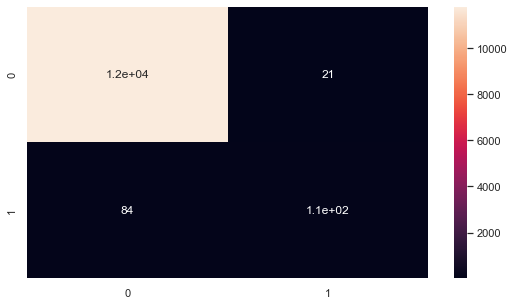

In [55]:
print("Accuracy score: ", accuracy_score(Y_validation, y_pred))
print()
print("Classification report: " '\n',  classification_report(Y_validation, y_pred))

cm = confusion_matrix(Y_validation, y_pred)
# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

print("Cofusion mtx: " '\n', confusion_matrix(Y_validation, y_pred))


The most suitable machine learning model is Random Forest Classifier. The model is also opropriate to us as it idemtyfy outliers. 

I made the decision based on:

Accuracy: 99%

**_____________________________________**

Neg precison: 99%

Neg recall: 100%



**_____________________________________**

Pos precison: 83%

Pos recall: 58%

**_____________________________________**

F1 score pos: 100%

F1 score neg: 69%

**_____________________________________**

Precision is the number of correct predictions that the model made.

Recall is the number of right predictions the model made through the total positive values present.

We have got high results with precision, but not with the recall. The problem of it could be the imbalansed data.
It is still a good result as their model gives less precision and recall as well. However, recall is low. It means that the model can not identify data properly. 

F1 score shows how precision and recall are balanced. The balance of both of them has a good result. 

The visualisation of the confusion matrix shows **True Negative** = 11787 (negative class (not related to API) correctly identified from 12000,  ) and **False Negative** = 80 (incorrectly predicted ) **|** **True Positive** = 111 (positive class (related to API) correctly identified) and **False Positive** = 22 (incorrectly predicted).


Those two metrics are very important for business. The importance of the metrics depends on the type of business. 

In some cases, the recall can be highly important especially if we need to work with sensitive predictions. 

In the study case, we need to predict failures for a specific component of the APS system. I would say that the company would better invest into the component as the models perform relatively well. 


### Precision-Recall Curve

I made the Precision-Recall Curve but it did not work for me as the precision > recall. 

# Curse of Dimensionality

### Explain in your own words what the “Curse of Dimensionality ” is.  
The course of Dimensionality refers to issues that could appear when working with highly-dimensional data frames. What does means dimensions? Dimensions are features/attributes that data frames consist of. For instance, if a dataset has one hundred or more we can call it highly dimensional. Highly dimensional data are complicated to perform in terms of visualisation and machine learning models. The complexity that could appear is related to ML training. Models are hardly trained with such a big amount of data. This problem is called the “Curse of Dimensionality”.
“Curse of Dimensionality” describes the explosive nature of the data. When the dimensionality of feature space increases it leads resulting an exponential increase in computational efforts. 


To work with ML models we need to have features to train the model. Hughes Phenomenon says if we increase the number of features the model will perform well as long as we have an optimal number of features. If we add more features to the training set it might decrease the classifier performance. 
As the number of features grows it will affect the space between elements becomes wider. So it requires more observation to keep the distance between data the same. If there is a high number of dimensions, more data will be needed to overcome the curse of dimensionality.
So if the distance between observations becomes sparse it will make the predictions. 


One of the solutions to work with high-dimensional data is PCA. It shrinks the data into a particular number of features. It helps to avoid the curse of dimensionality.


# Conclusion 

In the project, I performed EDA where I was able to find missing values and found the way how to replace(median) them. I performed a few visualisation technics in order to display missing values, distribution, the variance of PCA features and the confusion matrix. The technics are highly useful to understand the data. I applied MinMax scaler in order to normalise the data. I also applied PCA for dimensionality reduction which gave fewer features to perform. I run a few different ML algorithms in order to determine the best performance. Most of them gave results not less than 95%. I found the most suitable algorithm (KNN) which gives the best result in comparison regarding accuracy, precision and recall. 

###  References:

- Aayush Bajaj., 2019. What does your classification metric tell about your data? [online] Available at: https://towardsdatascience.com/what-does-your-classification-metric-tell-about-your-data-4a8f35408a8b#:~:text=A%20low%20recall%20score%20(%3C0.5,order%20to%20curb%20FP%2FFN, [Accessed 9 November 2022].

- Arjun Kashyap.,2019. Precision and recall — a simplified view. [online] Available at: https://towardsdatascience.com/precision-and-recall-a-simplified-view-bc25978d81e6, [Accessed  09 November 2022].

- Arushi Prakash.,2022. Working With Sparse Features In Machine Learning Models.  [online] Available at: https://www.kdnuggets.com/2021/01/sparse-features-machine-learning-models.html, [Accessed 8 November 2022].

- Bealdung., 2022. Differences Between Missing Data and Sparse Data. Available at:https://www.baeldung.com/cs/missing-vs-sparse-data, [Accessed 6 November 2022].

- FeeksforGeeks., 2021. median() function in Python statistics module. [online] Available at: https://www.geeksforgeeks.org/python-statistics-median/,  [Accessed  09 November 2022].

- GeeksforGeeks., 2021. Compute Classification Report and Confusion Matrix in Python. [online] Available at: https://www.geeksforgeeks.org/compute-classification-report-and-confusion-matrix-in-python/, [Accessed 9 November 2022].

- GeeksforGeeks., 2021. Normalization vs Standardization. [online] Available at: https://www.geeksforgeeks.org/normalization-vs-standardization/ ,[Accessed 8 November 2022].

- GeeksforGeeks., 2021. StandardScaler, MinMaxScaler and RobustScaler techniques – M. [online] Available at: https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/, [Accessed 8 November 2022].

- IBM Skills Network., Data Analysis with Python. [online] Available at: https://www.coursera.org/learn/data-analysis-with-python, [Accessed 18 October 2022].

- Kaggle.,.  2021. StandardScaler vs MinMaxScaler vs RobustScaler. [online] Available at: https://www.kaggle.com/questions-and-answers/265849, [Accessed 8 November 2022].

- Kaggle., 2020. Before PCA should we use MinMax or Standard scaler? [online] Available at: https://www.kaggle.com/general/212119, [Accessed  08 November 2022].

- Keshav.,(n.d). What is F1-score and what is it's importance in Machine learning? [online] Available at: https://vidyasheela.com/what-is-f1-score-and-what-is-its-importance-in-machine-learning/ , [Accessed  09 November 2022].

- Kklearn., (n.d).MinMaxScaler [online]. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html, [Accessed  08 November 2022].

- Matplotlib,. 2022. Matplotlib: Visualization with Python. [online] Available at: https://matplotlib.org/, [Accessed  24 October 2022].

- Numpy., 2022. NumPy fundamentals. [online] Available at: https://numpy.org/doc/1.21/user/basics.html, [Accessed 17 October 2022].

- Pandas., 2022. Pandas documentation. [online] Available at: https://pandas.pydata.org/docs/, [Accessed 17 October 2022].

- Pavan Vadapalli., 2021. Random Forest Classifier: Overview, How Does it Work, Pros & Cons. [online] Available at: https://www.upgrad.com/blog/random-forest-classifier/, [Accessed 9 November 2022].

- Rohit Kundu., 2022. Precision vs. Recall: Differences, Use Cases & Evaluation. [online] Available at: https://www.v7labs.com/blog/precision-vs-recall-guide, [Accessed  09 November 2022].

- Seaborn., 2022. Seaborn: statistical data visualization. [online] Available at: https://seaborn.pydata.org/, [Accessed 20 October 2022].

- Sharma ., (2018) ‘Data Visualization using Seaborn’, Towards Data Science. [online] Available at: https://towardsdatascience.com/data-visualization-using-seaborn-fc24db95a850 [Accessed 24 October 2022]

- Sharif, (n.d).,Linear Discriminant Analysis (LDA), Machine Learning.[online]  Available at:  https://www.aionlinecourse.com/tutorial/machine-learning/linear-discriminant-analysis-%28lda%29, [Accessed  09 November 2022].

- Shir Chorev., 2022. Recall in Machine Learning. [online] Available at: https://deepchecks.com/glossary/recall-in-machine-learning/, [Accessed 8 November 2022].

- Simplilearn, 2020., Explo.ratory Data Analysis In Python, Exploratory Data Analysis Project In Python, Simplilearn. [video online] Available at: https://www.youtube.com/watch?v=MoM6mighOJM&list=PLrTb3aZEpO2ka2zLgqN1L-ZTYR3hn2VOJ&index=9&t=928s, [Accessed 17 October 2022].

- Sklearn., (n.d) RobustScaler.  [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html?highlight=robustscaler#sklearn.preprocessing.RobustScaler, [Accessed 8 November 2022].

- Zach., 2021. When to Use Mean vs. Median.  [online] Available at:  https://www.statology.org/when-to-use-mean-vs-median/#:~:text=It's%20best%20to%20use%20the%20mean%20when%20the%20distribution%20of,when%20there%20are%20clear%20outliers, [Accessed  30 October 2022].
